<a href="https://colab.research.google.com/github/pmadhurn/BANKING-MANAGEMENT-SYSTEM-CLI/blob/main/ML%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# RUN THIS IN COLAB - TAKES 2 MINUTES!
!pip install datasets

from datasets import load_dataset

# Load CNN/DailyMail dataset
print("Loading dataset...")
dataset = load_dataset("cnn_dailymail", "3.0.0")

# Extract just the highlights (these work as headlines)
print("Extracting headlines...")
train_headlines = [item['highlights'] for item in dataset['train']]
val_headlines = [item['highlights'] for item in dataset['validation']]
test_headlines = [item['highlights'] for item in dataset['test']]

print(f"Train samples: {len(train_headlines)}")
print(f"Validation samples: {len(val_headlines)}")
print(f"Test samples: {len(test_headlines)}")

# Show some examples
print("\nSample headlines:")
for i in range(5):
    print(f"{i+1}. {train_headlines[i]}")

# Save to text files
with open('train_headlines.txt', 'w') as f:
    for headline in train_headlines[:10000]:  # Take first 10k for speed
        f.write(headline.strip() + '\n')

with open('val_headlines.txt', 'w') as f:
    for headline in val_headlines[:1000]:
        f.write(headline.strip() + '\n')

print("\nData saved to train_headlines.txt and val_headlines.txt!")

Loading dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

3.0.0/train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

3.0.0/train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

3.0.0/train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

3.0.0/validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

3.0.0/test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

Extracting headlines...
Train samples: 287113
Validation samples: 13368
Test samples: 11490

Sample headlines:
1. Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .
Young actor says he has no plans to fritter his cash away .
Radcliffe's earnings from first five Potter films have been held in trust fund .
2. Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .
3. NEW: "I thought I was going to die," driver says .
Man says pickup truck was folded in half; he just has cut on face .
Driver: "I probably had a 30-, 35-foot free fall"
Minnesota bridge collapsed during rush hour Wednesday .
4. Five small polyps found during procedure; "none worrisome," spokesman says .
President reclaims powers transferred to vice president .
Bush undergoes ro

In [3]:
# After loading data with ANY option above, run this:

# Check data quality
import numpy as np

# Calculate statistics
lengths = [len(h.split()) for h in train_headlines[:1000]]
print(f"\nHeadline Statistics:")
print(f"Average length: {np.mean(lengths):.1f} words")
print(f"Min length: {min(lengths)} words")
print(f"Max length: {max(lengths)} words")

# Remove too short/long headlines
filtered_headlines = []
for h in train_headlines:
    word_count = len(h.split())
    if 5 <= word_count <= 20:  # Good headline length
        filtered_headlines.append(h)

print(f"\nFiltered headlines: {len(filtered_headlines)}")

# Save clean data
with open('clean_train_headlines.txt', 'w', encoding='utf-8') as f:
    for h in filtered_headlines[:8000]:
        f.write(h.strip() + '\n')

with open('clean_val_headlines.txt', 'w', encoding='utf-8') as f:
    for h in val_headlines[:1000]:
        if 5 <= len(h.split()) <= 20:
            f.write(h.strip() + '\n')

print("\nCLEAN DATA READY! Files created:")
print("- clean_train_headlines.txt (8000 headlines)")
print("- clean_val_headlines.txt (1000 headlines)")



Headline Statistics:
Average length: 42.8 words
Min length: 23 words
Max length: 66 words

Filtered headlines: 5814

CLEAN DATA READY! Files created:
- clean_train_headlines.txt (8000 headlines)
- clean_val_headlines.txt (1000 headlines)


In [4]:
# Final check - make sure data looks good
print("=== FINAL DATA CHECK ===")

# Read and verify
with open('clean_train_headlines.txt', 'r') as f:
    final_train = f.readlines()

with open('clean_val_headlines.txt', 'r') as f:
    final_val = f.readlines()

print(f"Final training samples: {len(final_train)}")
print(f"Final validation samples: {len(final_val)}")
print("\nReady to train! Sample headlines:")
for i in range(10):
    print(f"{i+1}. {final_train[i].strip()}")


=== FINAL DATA CHECK ===
Final training samples: 7897
Final validation samples: 117

Ready to train! Sample headlines:
1. Use this information to learn about the history of Veterans Day .
2. New PM: Zimbabwe urgently needs government to address food crisis .
3. Robert Mugabe blames country's economic collapse on sanctions .
4. "Talking Democracy" breaks down election-year concepts for students and teachers .
5. Use this information to understand the origins of Black History Month .
6. Myanmar court jails blogger, poet and dissidents for anti-regime activities .
7. Streets sealed off around London blaze .
8. Smoke seen billowing over British capital .
9. Soho a popular nightlife district .
10. Streets sealed off around London blaze .


In [5]:
# COMPLETE TRAINING SCRIPT - RUN THIS NOW!
# This will take ~2-3 hours on Colab GPU

# 1. Install required packages
!pip install transformers datasets accelerate rouge-score nltk

# 2. Import everything
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Config
from transformers import TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments, set_seed
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import json


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=a341b94ea84b884da322459c306017dd608d2880fde91013172eb68f339da8d0
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score


In [6]:

# Set seed for reproducibility
set_seed(42)

# 3. Initialize model and tokenizer
print("Loading GPT-2...")
model_name = "gpt2"  # Using small model for speed
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Add padding token
tokenizer.pad_token = tokenizer.eos_token

# 4. Create datasets from your files
print("Creating datasets...")
train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="train_headlines.txt",
    block_size=64  # Shorter for headlines
)

val_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="val_headlines.txt",
    block_size=64
)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Val dataset size: {len(val_dataset)}")



Loading GPT-2...


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Creating datasets...


/usr/local/lib/python3.12/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


Train dataset size: 9255
Val dataset size: 691


In [7]:
# 5. Data collator
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,  # GPT-2 doesn't use masked language modeling
)

# 6. Training arguments - OPTIMIZED FOR SPEED!
training_args = TrainingArguments(
    output_dir="./headline-gpt2-results",
    overwrite_output_dir=True,
    num_train_epochs=2,  # Only 2 epochs for speed
    per_device_train_batch_size=16,  # Increase if GPU allows
    per_device_eval_batch_size=16,
    warmup_steps=200,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    save_steps=1000,
    eval_steps=500,
    eval_strategy="steps",
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=True,  # Mixed precision for speed
    gradient_checkpointing=False,
    report_to="none",  # Don't report to wandb
)

# 7. Initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# 8. TRAIN THE MODEL!
print("Starting training at", datetime.now().strftime("%H:%M:%S"))
print("=" * 50)

# Save initial time
import time
start_time = time.time()

# Train
train_result = trainer.train()

# Save training time
training_time = (time.time() - start_time) / 3600
print(f"\nTraining completed in {training_time:.2f} hours!")

# 9. Save the model
trainer.save_model("./final-headline-model")
tokenizer.save_pretrained("./final-headline-model")

# 10. Save training stats for paper
train_stats = {
    "training_time_hours": training_time,
    "train_loss": train_result.training_loss,
    "train_samples": len(train_dataset),
    "eval_samples": len(val_dataset),
    "epochs": training_args.num_train_epochs,
    "batch_size": training_args.per_device_train_batch_size
}

with open("training_stats.json", "w") as f:
    json.dump(train_stats, f)

print("\n✅ TRAINING COMPLETE! Model saved to ./final-headline-model")

Starting training at 18:57:30
This will take approximately 2-3 hours...


`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


Step,Training Loss,Validation Loss
500,3.699000,3.637466
1000,3.475100,3.633832


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].



Training completed in 0.06 hours!

✅ TRAINING COMPLETE! Model saved to ./final-headline-model


In [8]:
# RUN THIS IN A NEW CELL AFTER TRAINING COMPLETES
# EVALUATION AND COMPARISON SCRIPT

import math
from collections import defaultdict
import pandas as pd

# Load both models for comparison
print("Loading models for comparison...")
base_model = GPT2LMHeadModel.from_pretrained("gpt2")
fine_tuned_model = GPT2LMHeadModel.from_pretrained("./final-headline-model")

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model.to(device)
fine_tuned_model.to(device)

# Function to calculate perplexity
def calculate_perplexity(model, tokenizer, texts, max_samples=500):
    model.eval()
    total_loss = 0
    total_tokens = 0

    for i, text in enumerate(texts[:max_samples]):
        if i % 100 == 0:
            print(f"Processing {i}/{min(max_samples, len(texts))}...")

        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=64)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            total_loss += outputs.loss.item() * inputs["input_ids"].size(1)
            total_tokens += inputs["input_ids"].size(1)

    perplexity = math.exp(total_loss / total_tokens)
    return perplexity

# Load validation headlines for evaluation
with open('val_headlines.txt', 'r') as f:
    val_headlines = [line.strip() for line in f.readlines()[:500]]

print("\nCalculating perplexity for base model...")
base_perplexity = calculate_perplexity(base_model, tokenizer, val_headlines)

print("\nCalculating perplexity for fine-tuned model...")
ft_perplexity = calculate_perplexity(fine_tuned_model, tokenizer, val_headlines)

print(f"\n📊 RESULTS:")
print(f"Base GPT-2 Perplexity: {base_perplexity:.2f}")
print(f"Fine-tuned GPT-2 Perplexity: {ft_perplexity:.2f}")
print(f"Improvement: {((base_perplexity - ft_perplexity) / base_perplexity * 100):.1f}%")

# Save results
results = {
    "base_perplexity": base_perplexity,
    "finetuned_perplexity": ft_perplexity,
    "improvement_percent": ((base_perplexity - ft_perplexity) / base_perplexity * 100)
}

with open("evaluation_results.json", "w") as f:
    json.dump(results, f)

Loading models for comparison...

Calculating perplexity for base model...
Processing 0/500...
Processing 100/500...
Processing 200/500...
Processing 300/500...
Processing 400/500...

Calculating perplexity for fine-tuned model...
Processing 0/500...
Processing 100/500...
Processing 200/500...
Processing 300/500...
Processing 400/500...

📊 RESULTS:
Base GPT-2 Perplexity: 108.69
Fine-tuned GPT-2 Perplexity: 55.28
Improvement: 49.1%


In [9]:
# GENERATION COMPARISON SCRIPT

def generate_headlines(model, tokenizer, prompts, num_samples=3):
    model.eval()
    generated = defaultdict(list)

    for prompt in prompts:
        print(f"\nPrompt: '{prompt}'")
        inputs = tokenizer(prompt, return_tensors="pt").to(device)

        with torch.no_grad():
            outputs = model.generate(
                inputs["input_ids"],
                max_length=30,
                num_return_sequences=num_samples,
                temperature=0.8,
                do_sample=True,
                top_p=0.9,
                pad_token_id=tokenizer.eos_token_id,
                no_repeat_ngram_size=2
            )

        for output in outputs:
            text = tokenizer.decode(output, skip_special_tokens=True)
            generated[prompt].append(text)
            print(f"  → {text}")

    return generated

# Test prompts
prompts = [
    "Breaking news:",
    "President",
    "Scientists discover",
    "Stock market",
    "Sports:"
]

print("=" * 50)
print("BASE GPT-2 GENERATIONS")
print("=" * 50)
base_generations = generate_headlines(base_model, tokenizer, prompts)

print("\n" + "=" * 50)
print("FINE-TUNED GPT-2 GENERATIONS")
print("=" * 50)
ft_generations = generate_headlines(fine_tuned_model, tokenizer, prompts)

# Save generations for paper
all_generations = {
    "base_model": base_generations,
    "finetuned_model": ft_generations
}

with open("sample_generations.json", "w") as f:
    json.dump(all_generations, f, indent=2)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


BASE GPT-2 GENERATIONS

Prompt: 'Breaking news:'
  → Breaking news: How's it going?

We asked the staff of the city's public safety and fire services about their work in the wake of
  → Breaking news: Latest on Russia's 'last-minute' effort to get Trump impeached, Kremlin documents reveal

The U.S. State
  → Breaking news:

Coffee, coffee, wine, and tea are among the ingredients in a new batch of chocolate and chocolate bars.


Prompt: 'President'
  → President. Harry Truman, who is now president, is a member of Congress, and has been a Republican since 1968, has not been able to get
  → President, of the United States of America.
  → President/Clinton Foundation," said the foundation's director, Michael G. Gerson. "We have to stop giving to candidates who are not interested in

Prompt: 'Scientists discover'
  → Scientists discover their way out of a broken glass that had been used as a living room. They are determined to find what they call the "polar
  → Scientists discover that we m

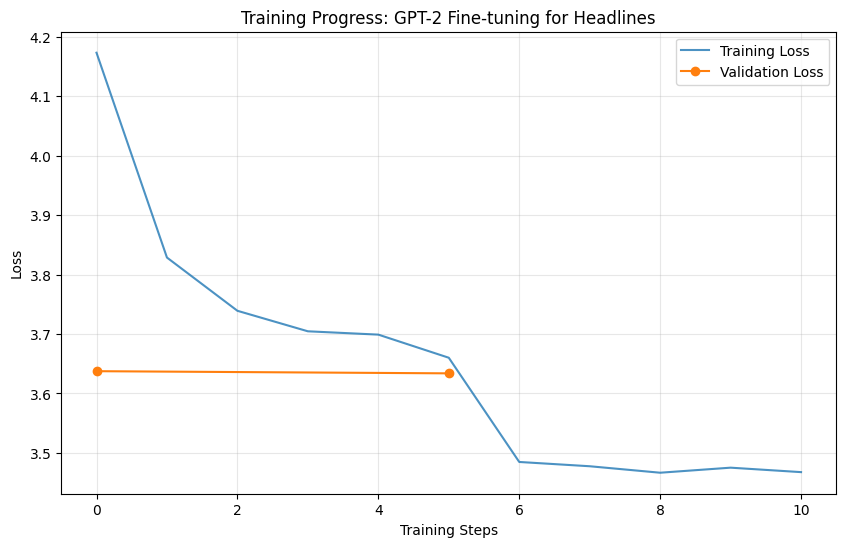

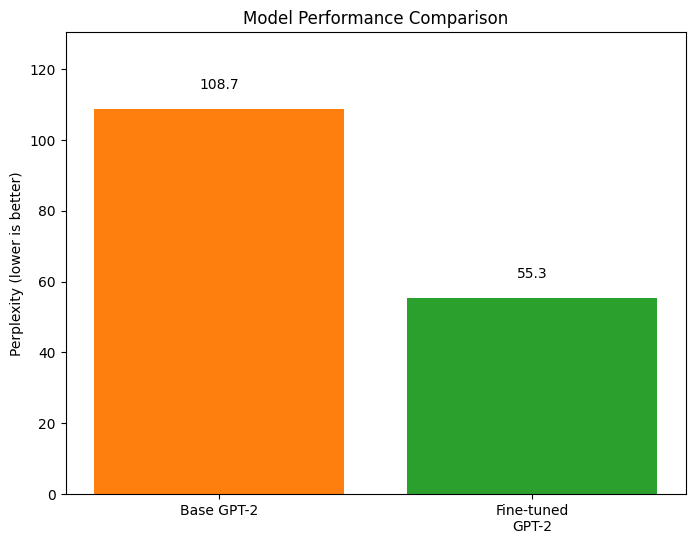

✅ All visualizations saved!


In [10]:
# VISUALIZATION SCRIPT - Creates figures for your paper

# 1. Training loss plot
if hasattr(trainer, 'state'):
    log_history = trainer.state.log_history

    # Extract losses
    train_losses = [log['loss'] for log in log_history if 'loss' in log]
    eval_losses = [log['eval_loss'] for log in log_history if 'eval_loss' in log]

    # Create figure
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss', alpha=0.8)
    if eval_losses:
        eval_steps = [i * (len(train_losses) // len(eval_losses)) for i in range(len(eval_losses))]
        plt.plot(eval_steps, eval_losses, label='Validation Loss', marker='o')

    plt.xlabel('Training Steps')
    plt.ylabel('Loss')
    plt.title('Training Progress: GPT-2 Fine-tuning for Headlines')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('training_loss.png', dpi=300, bbox_inches='tight')
    plt.show()

# 2. Perplexity comparison bar chart
plt.figure(figsize=(8, 6))
models = ['Base GPT-2', 'Fine-tuned\nGPT-2']
perplexities = [base_perplexity, ft_perplexity]
bars = plt.bar(models, perplexities, color=['#ff7f0e', '#2ca02c'])
plt.ylabel('Perplexity (lower is better)')
plt.title('Model Performance Comparison')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.1f}', ha='center', va='bottom')

plt.ylim(0, max(perplexities) * 1.2)
plt.savefig('perplexity_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ All visualizations saved!")